cluster_dbscan
 2     1871
 7      654
 4      552
 0      374
 1      224
 9       51
 8       34
 14      25
 3       21
 5       19
-1       19
 13      17
 16      15
 6        8
 11       7
 12       7
 10       5
 15       5
Name: count, dtype: int64


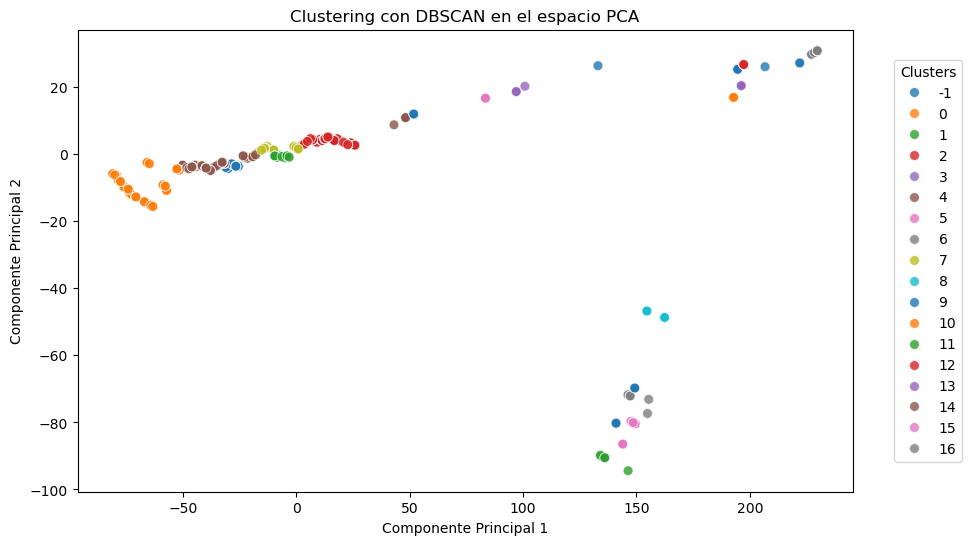

In [306]:
#DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Escalar los datos para normalizar las características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)  # Reemplaza 'features' por tus columnas relevantes

# Ajustar el modelo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajusta eps y min_samples según tu dataset
data['cluster_dbscan'] = dbscan.fit_predict(features_scaled)

# Mostrar la cantidad de puntos en cada cluster
print(data['cluster_dbscan'].value_counts())
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2', hue='cluster_dbscan', data=data, palette='tab10', s=50, alpha=0.8
)
plt.title("Clustering con DBSCAN en el espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clusters", bbox_to_anchor=(1.15, 0.5), loc='right')
plt.show()



cluster_dbscan
 2     1871
 4      500
 13     375
 7      279
 10     230
 1      224
 0       52
 15      45
 8       40
 11      34
 12      34
 27      25
 21      24
 3       21
 26      17
 16      17
 18      17
 5       16
 30      15
 20      11
 22       7
 6        7
 17       7
 9        7
 14       5
-1        5
 28       5
 24       4
 25       4
 19       4
 23       3
 29       3
Name: count, dtype: int64


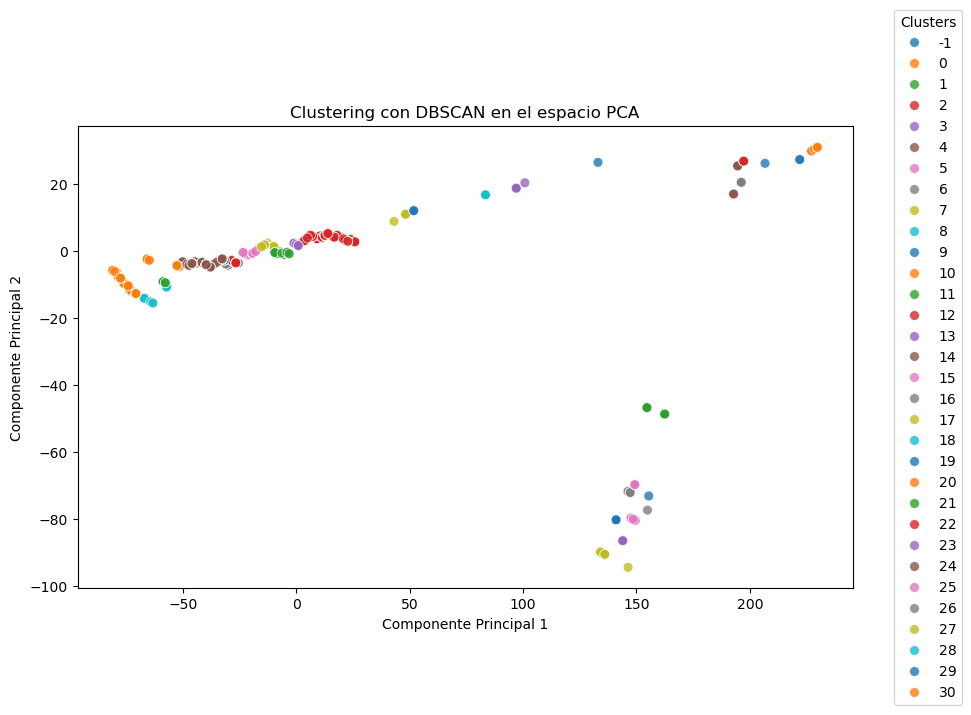

In [309]:
#DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Escalar los datos para normalizar las características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)  # Reemplaza 'features' por tus columnas relevantes

# Ajustar el modelo DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=3)  # Ajusta eps y min_samples según tu dataset
data['cluster_dbscan'] = dbscan.fit_predict(features_scaled)

# Mostrar la cantidad de puntos en cada cluster
print(data['cluster_dbscan'].value_counts())
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2', hue='cluster_dbscan', data=data, palette='tab10', s=50, alpha=0.8
)
plt.title("Clustering con DBSCAN en el espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clusters", bbox_to_anchor=(1.15, 0.5), loc='right')
plt.show()

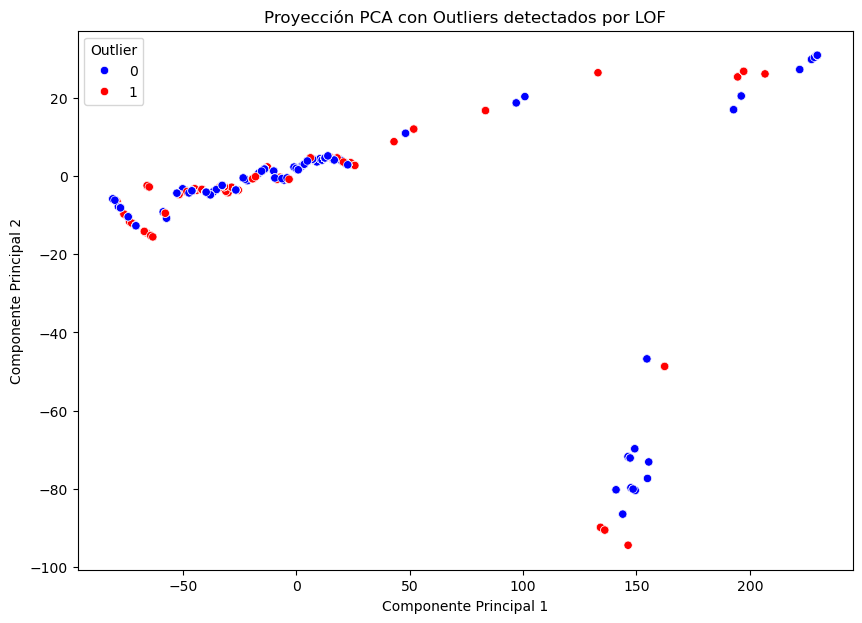

cluster_dbscan
 2     1871
 4      500
 13     375
 7      279
 10     230
 1      224
 0       52
 15      45
 8       40
 11      34
 12      34
 27      25
 21      24
 3       21
 26      17
 16      17
 18      17
 5       16
 30      15
 20      11
 22       7
 6        7
 17       7
 9        7
 14       5
-1        5
 28       5
 24       4
 25       4
 19       4
 23       3
 29       3
Name: count, dtype: int64


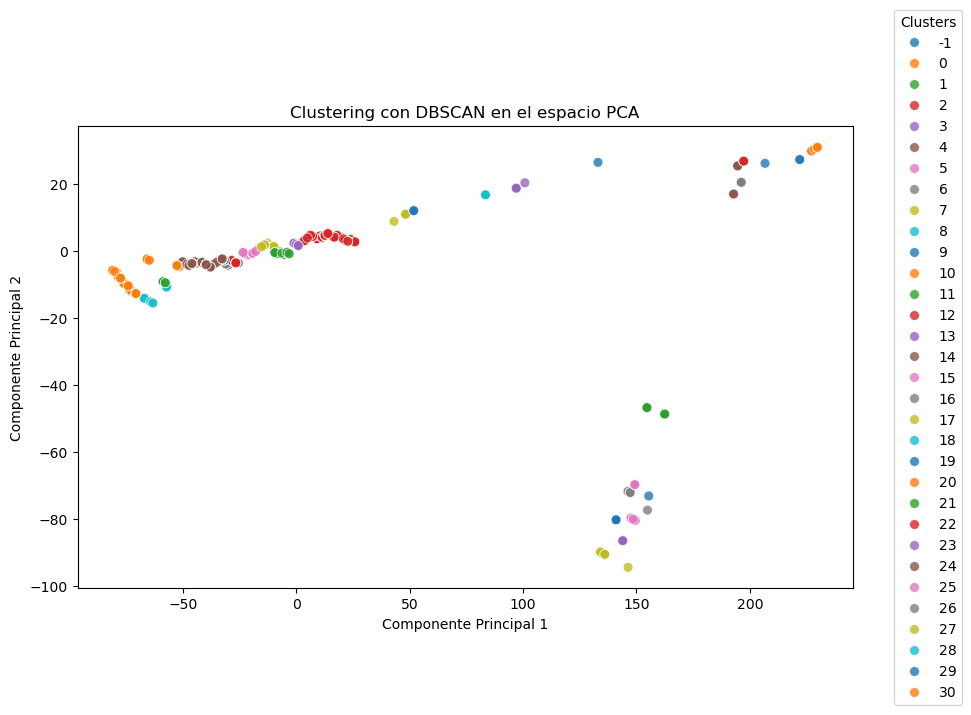

In [312]:
#DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Supongamos que ya seleccionaste las columnas numéricas relevantes
columnas_relevantes  = ['SubRubroCodigo', 'RubroCodigo', 'SubclasificacionCodigo', 'ClasificacionCodigo']
data_seleccionada = data[columnas_relevantes]

# Asegúrate de no tener valores nulos
data_seleccionada = data_seleccionada.dropna()

# Aplicar PCA para reducir a dos componentes principales
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(data_seleccionada)

# Agregar las componentes principales al DataFrame original
data['PC1'] = componentes_principales[:, 0]
data['PC2'] = componentes_principales[:, 1]

# ---- LOF ----
from sklearn.neighbors import LocalOutlierFactor

# Aplicar LOF para detectar outliers
lof = LocalOutlierFactor(n_neighbors=20)
data['Outlier'] = lof.fit_predict(data_seleccionada)
data['Outlier'] = data['Outlier'].apply(lambda x: 1 if x == -1 else 0)

# Scatterplot PCA con outliers resaltados
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Outlier', 
    data=data, 
    palette={0: 'blue', 1: 'red'}
)
plt.title("Proyección PCA con Outliers detectados por LOF")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Outlier", loc='best')
plt.show()

# ---- DBSCAN ----
# Escalar los datos para normalizar las características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(data_seleccionada)

# Ajustar el modelo DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=3)  # Ajusta eps y min_samples según tu dataset
data['cluster_dbscan'] = dbscan.fit_predict(features_scaled)

# Mostrar la cantidad de puntos en cada cluster
print(data['cluster_dbscan'].value_counts())

# Scatterplot DBSCAN
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2', hue='cluster_dbscan', data=data, palette='tab10', s=50, alpha=0.8
)
plt.title("Clustering con DBSCAN en el espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clusters", bbox_to_anchor=(1.15, 0.5), loc='right')
plt.show()



Catalogo
Normal     3613
Anómalo     295
Name: count, dtype: int64


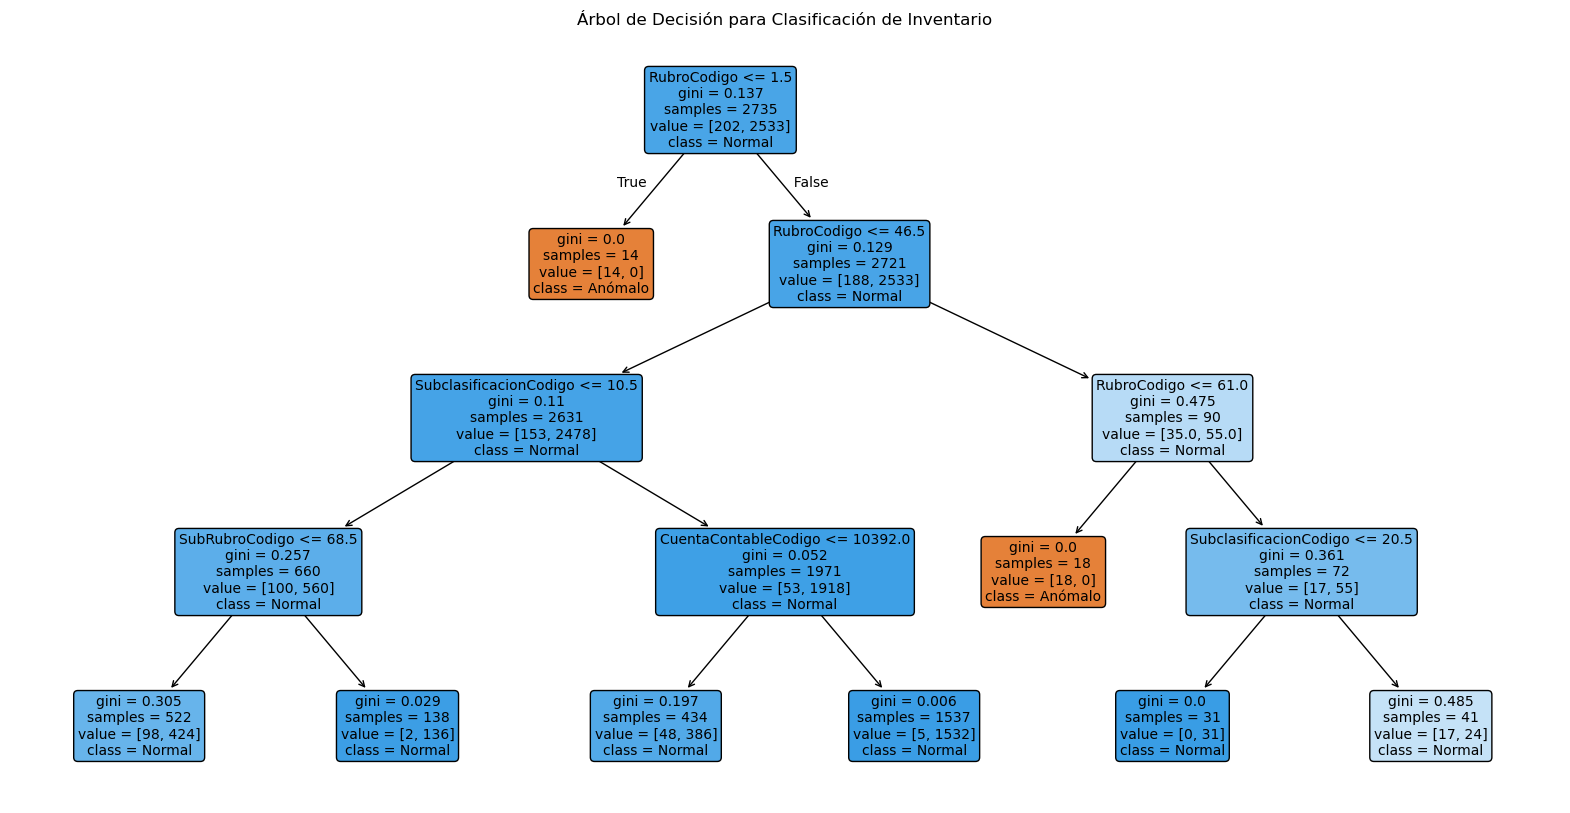

Precisión del modelo en el conjunto de prueba: 0.93


In [323]:
#arbol decision
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Crear la columna Catalogo basada en reglas personalizadas
# Regla 1: Incorporar etiquetas de anomalías (DBSCAN o LOF) si están disponibles
def clasificar_producto(row):
    
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['Catalogo'] = data.apply(clasificar_producto, axis=1)

# Verificar la distribución de las clases creadas
print(data['Catalogo'].value_counts())

# Supongamos que ya seleccionaste las columnas relevantes

columnas_relevantes = ['CuentaContableCodigo','ClasificacionCodigo', 'SubclasificacionCodigo', 'RubroCodigo','SubRubroCodigo' ]

data_seleccionada = data[columnas_relevantes]
data_seleccionada = data_seleccionada.dropna()

# Variable objetivo y predictores
y = data['Catalogo']
X = data_seleccionada

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un árbol de decisión
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)  # Ajusta max_depth si es necesario
dt_model.fit(X_train, y_train)

# Graficar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model, 
    feature_names=columnas_relevantes, 
    class_names=dt_model.classes_, 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Árbol de Decisión para Clasificación de Inventario")
plt.show()

# Evaluación básica del modelo
accuracy = dt_model.score(X_test, y_test)
print(f"Precisión del modelo en el conjunto de prueba: {accuracy:.2f}")

Catalogo2
Normal     3613
Anómalo     295
Name: count, dtype: int64


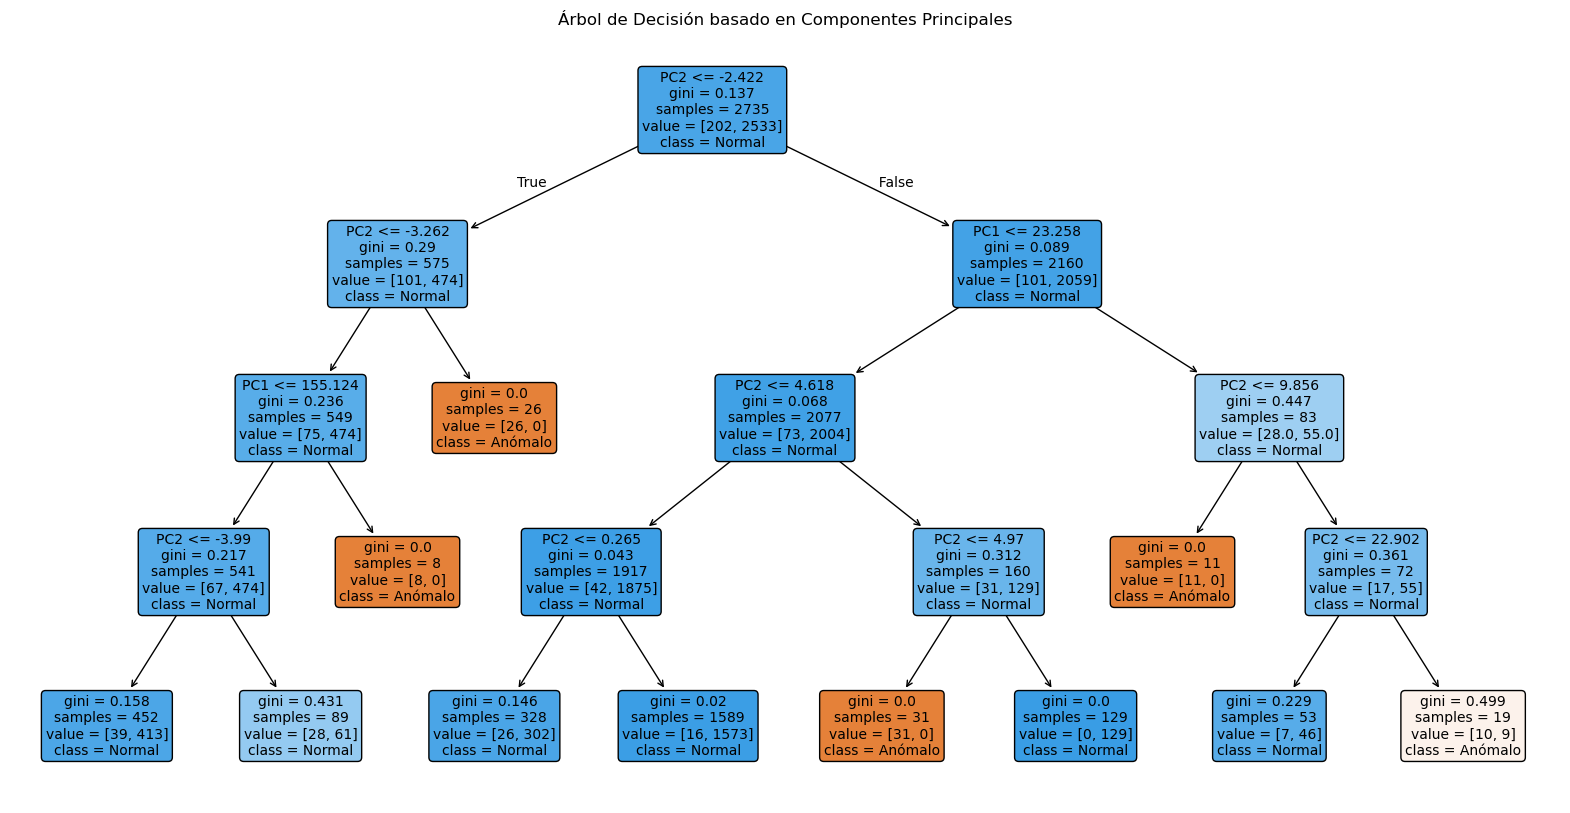

Precisión del modelo en el conjunto de prueba: 0.95


In [324]:
#arbol decision
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Crear la columna Catalogo2 basada en reglas personalizadas
# Regla 1: Incorporar etiquetas de anomalías (DBSCAN o LOF) si están disponibles
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['Catalogo2'] = data.apply(clasificar_producto, axis=1)

# Verificar la distribución de las clases creadas
print(data['Catalogo2'].value_counts())

# Usar las componentes principales obtenidas previamente como características
columnas_pca = ['PC1', 'PC2']
X = data[columnas_pca]
y = data['Catalogo2']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un árbol de decisión
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)  # Ajusta max_depth si es necesario
dt_model.fit(X_train, y_train)

# Graficar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model, 
    feature_names=columnas_pca, 
    class_names=dt_model.classes_, 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Árbol de Decisión basado en Componentes Principales")
plt.show()

# Evaluación básica del modelo
accuracy = dt_model.score(X_test, y_test)
print(f"Precisión del modelo en el conjunto de prueba: {accuracy:.2f}")


In [325]:
data.head(10)


,ProductoCodigo,Nombre,ImpuestoId,Impuesto,Descripcion,Activo,CuentaContableCodigo,CuentaContable,SubRubroCodigo,SubRubro,...,outlier,PC1,PC2,cluster,cluster_3,cluster_4,cluster_dbscan,target,Catalogo,Catalogo2
0,357,BATERIAS,1,IVA 21,BATERIAS DE VEHICULOS,1,10478,REPARACION Y MANTENIMIENTO DE RODADOS,28,BATERÍAS AUTOMOTICES,...,True,-51.793474,-4.735937,2,2,2,0,Anómalo,Anómalo,Anómalo
1,361,MATERIALES,1,IVA 21,MATERIALES PARA EL AREA DE PRODUCCION,1,10422,MATERIALES COMUNICACIÓN,71,ROUTER DE CONEXIÓN AÉREA Y PARA INTERIOR,...,False,-4.181758,-0.486802,0,0,0,1,Normal,Normal,Normal
2,364,ROPA DE TRABAJO,1,IVA 21,NaN,1,10372,ROPA DE TRABAJO,76,EQUIPAMIENTO Y MATERIALES AUDIO,...,False,2.181575,2.473514,0,0,0,2,Normal,Normal,Normal
3,372,COMBUSTIBLES Y LUBRICANTES,1,IVA 21,COMBUSTIBLES Y LUBRINCANTES.,1,10415,COMBUSTIBLES Y LUBRICANTES,159,REPARACIÓN Y MANTENIMIENTO RODADOS,...,False,96.949614,18.696982,3,1,3,3,Normal,Normal,Normal
4,373,MATERIALES ELECTRICOS,1,IVA 21,NaN,0,10420,MATERIALES ELECTRICOS,70,MATERIALES DE CONEXIONES VARIOS,...,False,-5.455004,-1.023043,0,0,0,1,Normal,Normal,Normal
5,384,MATERIALES DE COMUNICACION,1,IVA 21,MATERIALES DE COMUNICACION,0,10422,MATERIALES COMUNICACIÓN,70,MATERIALES DE CONEXIONES VARIOS,...,False,-5.455004,-1.023043,0,0,0,1,Normal,Normal,Normal
6,389,"MATERIALES DE COMUNICACIÓN AL 10,5",2,"IVA 10,5",NaN,0,10422,MATERIALES COMUNICACIÓN,70,MATERIALES DE CONEXIONES VARIOS,...,False,-5.455004,-1.023043,0,0,0,1,Normal,Normal,Normal
7,390,RESMAS,1,IVA 21,RESMAS AUTOR,1,10391,PAPELERIA E IMPRESIONES,87,PAPEL,...,False,14.796914,4.794449,0,0,0,2,Anómalo,Anómalo,Anómalo
8,391,PAPELERÍA,1,IVA 21,PAPELES- HOJAS.,1,10391,PAPELERIA E IMPRESIONES,87,PAPEL,...,False,14.796914,4.794449,0,0,0,2,Anómalo,Anómalo,Anómalo
9,392,MATERIALES DE FERRETERÍA,1,IVA 21,NaN,0,10599,MATERIALES VARIOS,86,ARTÍCULOS DE LIBRERÍA Y PAPELERÍA VARIOS,...,False,13.860961,5.146438,0,0,0,2,Normal,Normal,Normal


In [328]:
#arbol decision
# Comparo catalogo y catalogo2
comparacion = data['Catalogo'] == data['Catalogo2']

# Conteo de valores coincidentes
total_iguales = comparacion.sum()
total_diferentes = len(data) - total_iguales
porcentaje_iguales = (total_iguales / len(data)) * 100

print(f"Total de valores iguales: {total_iguales}")
print(f"Total de valores diferentes: {total_diferentes}")
print(f"Porcentaje de coincidencia: {porcentaje_iguales:.2f}%")




Total de valores iguales: 3908
Total de valores diferentes: 0
Porcentaje de coincidencia: 100.00%


Clasificación del modelo SVM:
              precision    recall  f1-score   support

     Anómalo       1.00      0.08      0.14        93
      Normal       0.93      1.00      0.96      1080

    accuracy                           0.93      1173
   macro avg       0.96      0.54      0.55      1173
weighted avg       0.93      0.93      0.90      1173

Matriz de confusión:
[[   7   86]
 [   0 1080]]


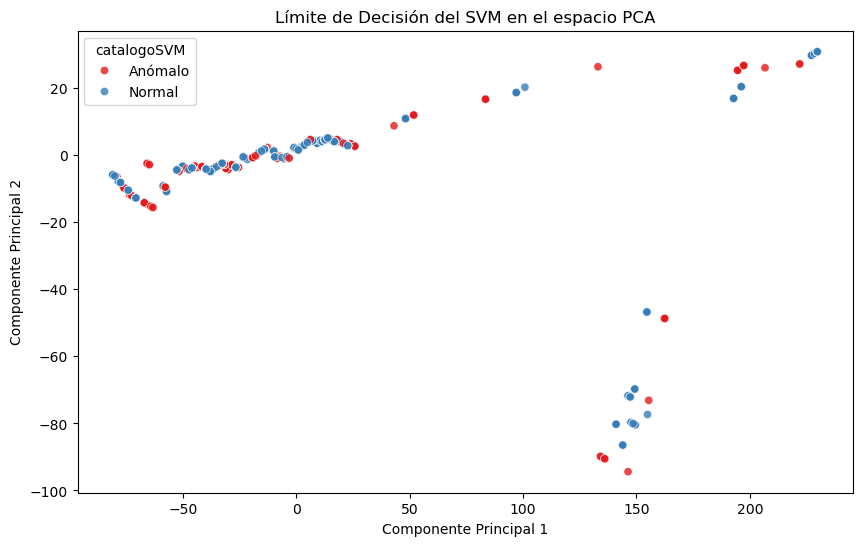

In [329]:
#svm
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la columna catalogoSVM basada en reglas personalizadas
# Regla 1: Incorporar etiquetas de anomalías (DBSCAN o LOF) si están disponibles
def clasificar_producto(row):
    if  row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['catalogoSVM'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos para SVM
# Usar componentes principales o columnas relevantes como predictores
columnas_pca = ['PC1', 'PC2']  # Cambia a las columnas relevantes si no usas PCA
X = data[columnas_pca]
y = data['catalogoSVM']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Entrenar el modelo SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = svm_model.predict(X_test)
print("Clasificación del modelo SVM:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualización del límite de decisión si usamos PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='catalogoSVM', data=data, palette='Set1', alpha=0.8)
plt.title("Límite de Decisión del SVM en el espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


In [330]:
#dataset luego de svm
data.tail(10)

,ProductoCodigo,Nombre,ImpuestoId,Impuesto,Descripcion,Activo,CuentaContableCodigo,CuentaContable,SubRubroCodigo,SubRubro,...,PC1,PC2,cluster,cluster_3,cluster_4,cluster_dbscan,target,Catalogo,Catalogo2,catalogoSVM
3898,6146,ROUTER CR2116-12G-4S 16 GB RAM,1,IVA 21,"16GB RAM, 13xGb Ethernet y 4xSFP+ Puertos",1,10422,MATERIALES COMUNICACIÓN,72,SOHO (MODEM-ROUTER-SWITCH DE TIPO SMALL OFFICE...,...,-3.245805,-0.838791,0,0,0,1,Anómalo,Anómalo,Anómalo,Anómalo
3899,6147,SOPORTE TRAPECIO 300MM DOBLE SUSPENSION PARA B...,1,IVA 21,NaN,1,10422,MATERIALES COMUNICACIÓN,75,OTROS CCESORIOS PARA CABLEADO,...,0.787638,1.583763,0,0,0,13,Normal,Normal,Normal,Normal
3900,6148,SELLOS PERSONALIZADOS,1,IVA 21,NaN,1,10082,MUEBLES Y UTILES,86,ARTÍCULOS DE LIBRERÍA Y PAPELERÍA VARIOS,...,13.860961,5.146438,0,0,0,2,Normal,Normal,Normal,Normal
3901,6149,IMPRESORA LASER B230V DNIA 34PPM LAN + WIFI,2,"IVA 10,5",NaN,1,10089,MAQUINAS Y EQUIPOS EMPRESA,93,IMPRESORAS,...,20.749926,3.570746,0,0,0,2,Anómalo,Anómalo,Anómalo,Anómalo
3902,6154,TABLET 10´ PROCESADOR QUAD CORE RAM 2GB 32G,2,"IVA 10,5",Tablet para Donacion TK 21216/2024,1,10073,EQUIPOS - Bienes de Cambio,236,CELULARES Y ACCESORIOS,...,154.591238,-46.763650,3,1,3,11,Normal,Normal,Normal,Normal
3903,6155,SMARTWATCH NM-PLUS BT,1,IVA 21,relojes digitales para Donacion TK 21216/2024,1,10073,EQUIPOS - Bienes de Cambio,236,CELULARES Y ACCESORIOS,...,154.591238,-46.763650,3,1,3,11,Normal,Normal,Normal,Normal
3904,6156,ETHERNET ADAPTADOR STARLINK,1,IVA 21,NaN,1,10422,MATERIALES COMUNICACIÓN,95,PERIFÉRICOS Y ACCESORIOS DE INFORMÁTICA,...,22.621832,2.866769,0,0,0,2,Normal,Normal,Normal,Normal
3905,6157,PIZARRA BLANCA MARCO ALUMINIO,1,IVA 21,NaN,1,10082,MUEBLES Y UTILES,86,ARTÍCULOS DE LIBRERÍA Y PAPELERÍA VARIOS,...,13.860961,5.146438,0,0,0,2,Normal,Normal,Normal,Normal
3906,6158,BORRADOR DE PIZARRA CON 3 MARCADORES,1,IVA 21,NaN,1,10082,MUEBLES Y UTILES,86,ARTÍCULOS DE LIBRERÍA Y PAPELERÍA VARIOS,...,13.860961,5.146438,0,0,0,2,Normal,Normal,Normal,Normal
3907,6159,PROTECTOR ALTA Y BAJA TENSION DIGITAL 10A 220V,1,IVA 21,NaN,1,10422,MATERIALES COMUNICACIÓN,75,OTROS CCESORIOS PARA CABLEADO,...,0.787638,1.583763,0,0,0,13,Normal,Normal,Normal,Normal
